# **Proyek Analisis Data: Bike Sharing Dataset**

*  Nama: Muhammad Fadel Hamka
* Email: fadelhamka123@gmail.com
* Id Dicoding: fadelhamka
---


# **Menetukan Pertanyaan Bisnis**
1. Bagaimana pengaruh faktor cuaca terhadap jumlah pengguna sepeda?
2. Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?

# **Import Semua Library/Packages yang Akan Digunakan**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Wrangling**


## **1.1 Gathering Data**

In [62]:
# Use the raw link to read the CSV files
url_day = "https://raw.githubusercontent.com/Fadelhamkaa/Bike-Sharing-Dataset/main/day.csv"
day = pd.read_csv(url_day)

url_hour = "https://raw.githubusercontent.com/Fadelhamkaa/Bike-Sharing-Dataset/main/hour.csv"
hour = pd.read_csv(url_hour)

# Create a dictionary to hold the DataFrames
data = {
    'day': day,
    'hour': hour
}

# Display the first 5 rows for each DataFrame
for df_name, df in data.items():
    print(f'\nFirst 5 rows of {df_name} DataFrame:')
    print(df.head())


First 5 rows of day DataFrame:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1

### **Fitur dalam Bike Sharing Dataset:**

- **datetime**: Waktu (tanggal dan jam) pencatatan peminjaman sepeda.
- **season**: Musim dalam setahun:
  - 1 = Musim semi
  - 2 = Musim panas
  - 3 = Musim gugur
  - 4 = Musim dingin
- **yr**: Tahun (0 = 2011, 1 = 2012).
- **mnth**: Bulan (1 = Januari, 2 = Februari, ..., 12 = Desember).
- **hr**: Jam dalam format 24 jam (0–23).
- **holiday**: Indikator apakah hari tersebut adalah hari libur nasional (0 = tidak, 1 = ya).
- **weekday**: Hari dalam seminggu (0 = Minggu, 1 = Senin, ..., 6 = Sabtu).
- **workingday**: Indikator apakah hari tersebut adalah hari kerja (1 = ya, 0 = tidak).
- **weathersit**: Kondisi cuaca saat peminjaman sepeda:
  - 1 = Cerah, sedikit mendung
  - 2 = Berawan, kabut
  - 3 = Hujan ringan, salju ringan
  - 4 = Hujan deras, salju deras (kondisi buruk)
- **temp**: Suhu dalam skala normalisasi (0–1) (dikalkulasi berdasarkan suhu nyata dalam Celsius).
- **atemp**: Suhu yang dirasakan (feels-like temperature) dalam skala normalisasi (0–1).
- **hum**: Kelembapan relatif dalam skala normalisasi (0–1).
- **windspeed**: Kecepatan angin dalam skala normalisasi (0–1).
- **casual**: Jumlah pengguna sepeda yang tidak berlangganan (pengguna kasual).
- **registered**: Jumlah pengguna sepeda yang sudah berlangganan.
- **cnt**: Total jumlah sepeda yang dipinjam (casual + registered).


## **1.2 Assessing Data**

### **1.2.1 Periksa Semua Tipe Data**

In [63]:
# Iterate through the dictionary and display info for each DataFrame
for df_name, df in data.items():
    print(f'\nDataFrame: {df_name}')
    print(df.info())
    print(df.describe())


DataFrame: day
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     we

## **1.2.2. Periksa Data yang Duplikat**

In [64]:
# Initialize dictionaries to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
result_df = pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

# Display the result DataFrame
print(result_df)

# Display messages in Indonesian about duplicate counts
for df_name, count in duplicate_counts.items():
    print(f'Jumlah duplikat pada dataset {df_name}: {count}')

      Total Sample Count  Duplicate Count
day                  731                0
hour               17379                0
Jumlah duplikat pada dataset day: 0
Jumlah duplikat pada dataset hour: 0


### **1.2.3. Memeriksa Nilai yang Hilang**

In [65]:
# Periksa nilai yang hilang
print("Periksa nilai yang hilang:")
for df_name, df in data.items():
    missing_values = df.isnull().sum()
    print(f'\nJumlah nilai yang hilang pada dataset {df_name}:')
    print(missing_values[missing_values > 0])  # Hanya tampilkan kolom dengan nilai yang hilang

Periksa nilai yang hilang:

Jumlah nilai yang hilang pada dataset day:
Series([], dtype: int64)

Jumlah nilai yang hilang pada dataset hour:
Series([], dtype: int64)


### Insight:
- **Tidak ada nilai yang hilang**: Dataset ini tidak memiliki nilai yang hilang, sehingga tidak perlu dilakukan imputasi.
  
- **Tidak ada data duplikat**: Semua entri dalam dataset unik, sehingga tidak ada langkah yang diperlukan untuk menghapus duplikasi.

- **Kolom `datetime`**: Kolom `datetime` bertipe objek dan perlu diubah menjadi tipe datetime untuk analisis yang lebih efektif.

- **Kolom Kategorikal**: Kolom `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, dan `weathersit` adalah kategori dan perlu dikonversi ke tipe kategori untuk analisis yang lebih baik.

- **Indikator Hari Libur**: Kolom `holiday` memiliki nilai 0 untuk sebagian besar data, menunjukkan bahwa sebagian besar hari dalam dataset bukanlah hari libur.

- **Distribusi Pengguna**: Kolom `cnt` menunjukkan distribusi yang cukup luas, menandakan adanya variasi signifikan dalam jumlah pengguna sepeda setiap harinya.

## **1.3 Cleaning Data**


### **1.3.1 Melakukan Pembersihan pada Dataset day**

In [66]:
# Mengubah kolom 'datetime' menjadi datetime
day['dteday'] = pd.to_datetime(day['dteday'])

# Mengonversi kolom kategori menjadi tipe category
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    day[col] = day[col].astype('category')

# Menampilkan hasil perubahan tipe data
print("Info Dataset day Setelah Cleaning")
print(day.info())

Info Dataset day Setelah Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64       

### **1.3.2 Melakukan Pembersihan pada Dataset hour**

In [67]:
# Mengubah kolom 'datetime' menjadi datetime
hour['dteday'] = pd.to_datetime(hour['dteday'])

# Mengonversi kolom kategori menjadi tipe category
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    hour[col] = hour[col].astype('category')

# Menampilkan hasil perubahan tipe data
print("Info Dataset hour Setelah Cleaning")
print(hour.info())

Info Dataset hour Setelah Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64  

### Insight yang Didapat:
- **Kolom `datetime` telah berhasil diubah menjadi tipe datetime**, yang memungkinkan analisis berbasis waktu dilakukan dengan lebih tepat dan akurat.
  
- **Kolom-kolom kategorikal** seperti `season`, `yr`, `mnth`, dan lainnya telah dikonversi menjadi tipe kategori, yang tidak hanya mengoptimalkan penggunaan memori tetapi juga mempermudah proses analisis data.

- **Tidak terdapat data duplikat atau nilai yang hilang**, sehingga tidak ada langkah tambahan yang diperlukan untuk pembersihan data. Hal ini menunjukkan bahwa dataset sudah dalam kondisi yang baik untuk analisis lebih lanjut.

- **Dataset kini siap untuk tahap eksplorasi dan analisis lebih lanjut**, memungkinkan peneliti untuk fokus pada penggalian wawasan dan pola dari data tanpa harus khawatir tentang masalah kualitas data.

- **Pentingnya Tipe Data yang Sesuai**: Dengan memastikan bahwa kolom memiliki tipe data yang tepat, analisis yang dilakukan akan lebih efisien dan hasilnya lebih dapat diandalkan.

### **1.3.3 Pembersihan Data: Mengubah Format untuk Analisis**

In [68]:
# Ubah data ke format long agar mudah divisualisasikan
df_melt = hour.melt(id_vars=['dteday', 'workingday', 'weathersit'],
                    value_vars=['casual', 'registered'],
                    var_name='user_type',
                    value_name='count')

# Mapping kondisi cuaca ke label yang lebih informatif
weather_mapping = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan/Radang",
    4: "Cuaca Buruk"
}
df_melt['weather'] = df_melt['weathersit'].map(weather_mapping)

# Mapping tipe hari: 1 = Hari Kerja, 0 = Akhir Pekan
workingday_mapping = {1: "Hari Kerja", 0: "Akhir Pekan"}
df_melt['day_type'] = df_melt['workingday'].map(workingday_mapping)

### **1.3.3 Menggabungkan Kedua Dataset menjadi all_df**

In [69]:
# Menggabungkan dataset yang telah dibersihkan
all_df = pd.merge(hour, day, on="dteday", how="inner")

# Menampilkan 5 baris pertama dari dataset gabungan
print(all_df.head())

   instant_x     dteday season_x yr_x mnth_x  hr holiday_x weekday_x  \
0          1 2011-01-01        1    0      1   0         0         6   
1          2 2011-01-01        1    0      1   1         0         6   
2          3 2011-01-01        1    0      1   2         0         6   
3          4 2011-01-01        1    0      1   3         0         6   
4          5 2011-01-01        1    0      1   4         0         6   

  workingday_x weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0            0            1  ...          6             0             2   
1            0            1  ...          6             0             2   
2            0            1  ...          6             0             2   
3            0            1  ...          6             0             2   
4            0            1  ...          6             0             2   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y registered_y cnt_y  
0  0.344167  0.363625  0.805833     0.16

In [70]:
# Memeriksa nilai yang hilang dalam dataset gabungan
print(all_df.isna().sum())

instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
hr              0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64


In [71]:
# Menampilakn Jumlah Duplikasi yang Ada
print("Jumlah duplikasi: ", all_df.duplicated().sum())
all_df.describe()

Jumlah duplikasi:  0


,instant_x,dteday,hr,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,instant_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,367.172622,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,185.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,367.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,549.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,210.072051,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


In [72]:
# Hapus kolom duplikat yang tidak diperlukan
all_df = all_df.drop(columns=['instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y',
                              'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y',
                              'atemp_y', 'hum_y', 'windspeed_y', 'casual_y',
                              'registered_y', 'cnt_y'])
# Rename kolom _x agar lebih bersih
all_df = all_df.rename(columns=lambda x: x.replace('_x', ''))

all_df["weathersit"] = all_df["weathersit"].astype(int)
all_df = all_df[all_df["weathersit"] <= 3]

In [73]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17376 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17376 non-null  int64         
 1   dteday      17376 non-null  datetime64[ns]
 2   season      17376 non-null  category      
 3   yr          17376 non-null  category      
 4   mnth        17376 non-null  category      
 5   hr          17376 non-null  int64         
 6   holiday     17376 non-null  category      
 7   weekday     17376 non-null  category      
 8   workingday  17376 non-null  category      
 9   weathersit  17376 non-null  int64         
 10  temp        17376 non-null  float64       
 11  atemp       17376 non-null  float64       
 12  hum         17376 non-null  float64       
 13  windspeed   17376 non-null  float64       
 14  casual      17376 non-null  int64         
 15  registered  17376 non-null  int64         
 16  cnt         17376 non-null 

### Insights Sementa yang Didapat dari Merging lalu Cleaning Data:
- **Tidak ada nilai yang hilang atau data duplikat**: Dataset ini bersih dari masalah tersebut.
- **Menghapus kolom yang tidak diperlukan**: Dengan menghapus kolom duplikat, dataset menjadi lebih rapi.
- **Menambahkan informasi jam (hr)**: Detail jam pada data harian ditambahkan, sehingga analisis selanjutnya dapat dilakukan dengan lebih mendalam.
---

# **2. Exploratory Data Anlysis (EDA)**

## **2.1 Explore all_df**

### **2.1.1 Memeriksa truktur dan Statistik Deskriptif Dataset**

In [74]:
# Memeriksa struktur dataset
print("Info Dataset:")
print(all_df.info())

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(all_df.describe())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 17376 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17376 non-null  int64         
 1   dteday      17376 non-null  datetime64[ns]
 2   season      17376 non-null  category      
 3   yr          17376 non-null  category      
 4   mnth        17376 non-null  category      
 5   hr          17376 non-null  int64         
 6   holiday     17376 non-null  category      
 7   weekday     17376 non-null  category      
 8   workingday  17376 non-null  category      
 9   weathersit  17376 non-null  int64         
 10  temp        17376 non-null  float64       
 11  atemp       17376 non-null  float64       
 12  hum         17376 non-null  float64       
 13  windspeed   17376 non-null  float64       
 14  casual      17376 non-null  int64         
 15  registered  17376 non-null  int64         
 16  cnt         1

### **2.1.2 Memeriksa Distribusi Jumlah Pengguna Sepeda**

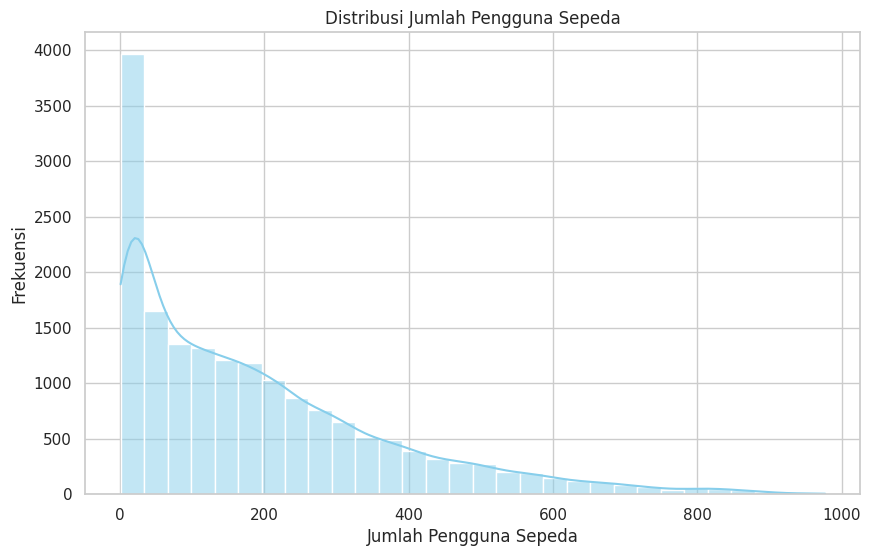

In [75]:
# Visualisasi distribusi jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.histplot(all_df['cnt'], bins=30, color='skyblue', kde=True)
plt.title('Distribusi Jumlah Pengguna Sepeda')
plt.xlabel('Jumlah Pengguna Sepeda')
plt.ylabel('Frekuensi')
plt.show()

### **2.1.3 Menghitung Rata-rata Pengguna Sepeda Berdasarkan Cuaca**

<ipython-input-76-0f9eef4b94ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_effect, palette='pastel')


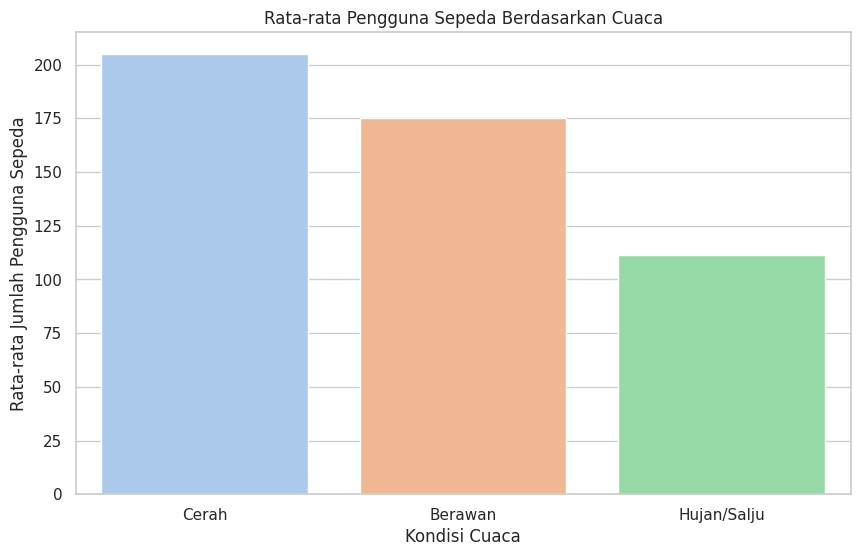

In [76]:
# Rata-rata pengguna sepeda berdasarkan kondisi cuaca
weather_effect = all_df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_effect, palette='pastel')
plt.title('Rata-rata Pengguna Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Berawan', 'Hujan/Salju'])
plt.show()

### **2.1.4  Menghitung Rata-rata Pengguna Sepeda Berdasarkan Hari Kerja vs. Akhir Pekan**

<ipython-input-77-72ef2fe8ff7e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_type_effect = all_df.groupby('day_type')['cnt'].mean().reset_index()
<ipython-input-77-72ef2fe8ff7e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=day_type_effect, palette='Set2')


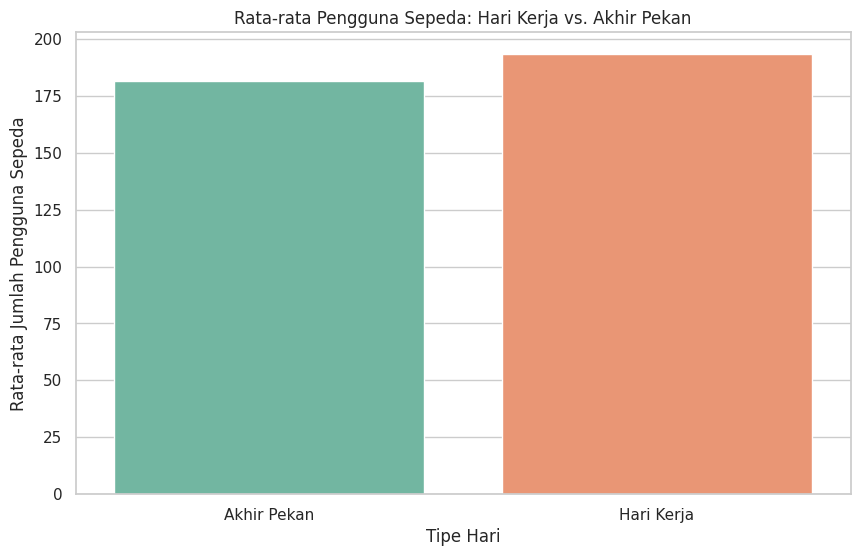

In [77]:
# Rata-rata pengguna sepeda berdasarkan hari kerja dan akhir pekan
all_df['day_type'] = all_df['workingday'].map({1: 'Hari Kerja', 0: 'Akhir Pekan'})
day_type_effect = all_df.groupby('day_type')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='cnt', data=day_type_effect, palette='Set2')
plt.title('Rata-rata Pengguna Sepeda: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()

### **2.1.5 Visualisasi Rata-rata Pengguna Sepeda Berdasarkan Musim**

<ipython-input-78-fe4fd7098b6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=all_df, estimator=np.mean, palette='viridis')


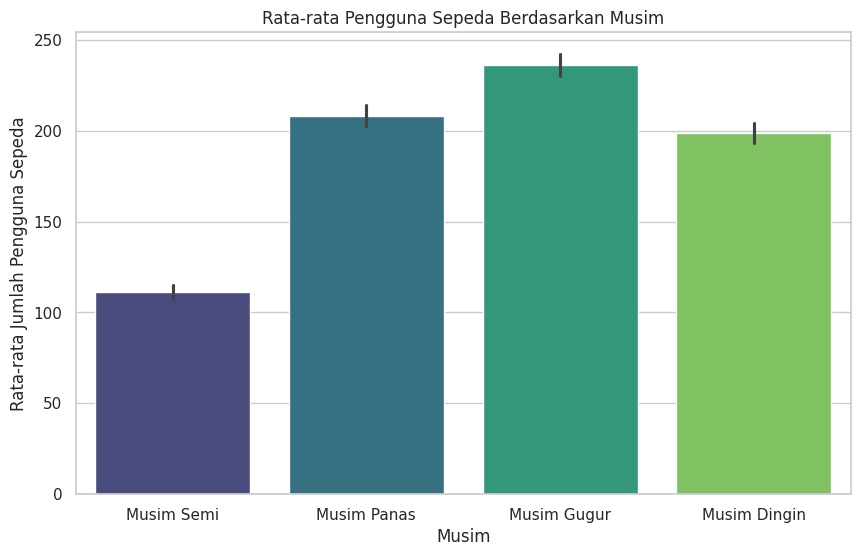

In [78]:
# Visualisasi rata-rata pengguna sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=all_df, estimator=np.mean, palette='viridis')
plt.title('Rata-rata Pengguna Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

### **2.1.6 Memeriksa Pola Penggunaan Sepeda Berdasarkan Bulan**

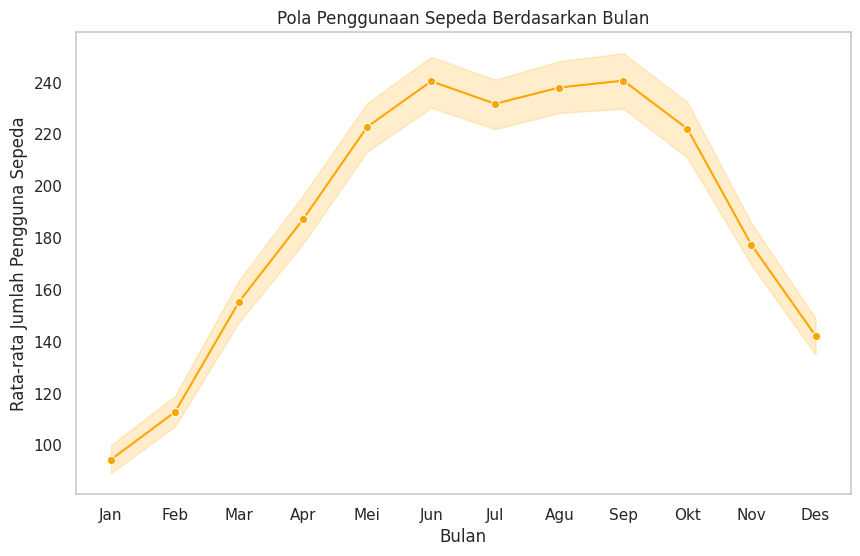

In [79]:
# Visualisasi pola penggunaan sepeda berdasarkan bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=all_df, estimator=np.mean, marker='o', color='orange')
plt.title('Pola Penggunaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid()
plt.show()

### **2.1.7 Memeriksa Pengaruh Suhu terhadap Jumlah Pengguna Sepeda**

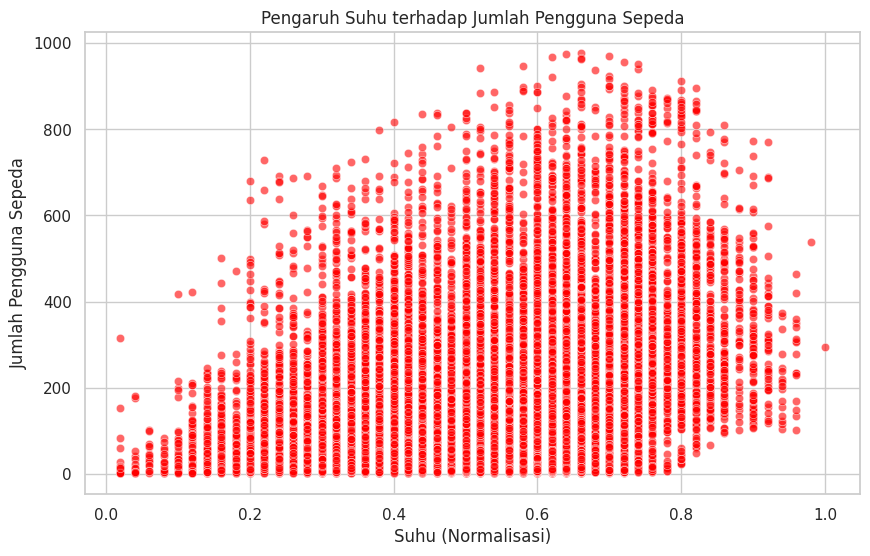

In [80]:
# Visualisasi pengaruh suhu terhadap jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=all_df, color='red', alpha=0.6)
plt.title('Pengaruh Suhu terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### **2.1.8 Memeriksa Pengaruh Kelembapan terhadap Jumlah Pengguna Sepeda**

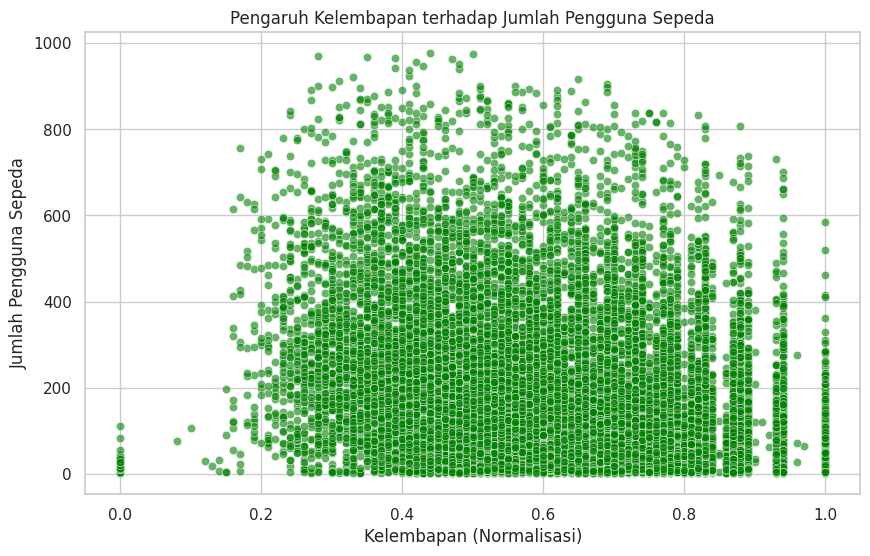

In [81]:
# Visualisasi pengaruh kelembapan terhadap jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=all_df, color='green', alpha=0.6)
plt.title('Pengaruh Kelembapan terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kelembapan (Normalisasi)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### **2.1.9 Memeriksa Pengaruh Kecepatan Angin terhadap Jumlah Pengguna Sepeda**

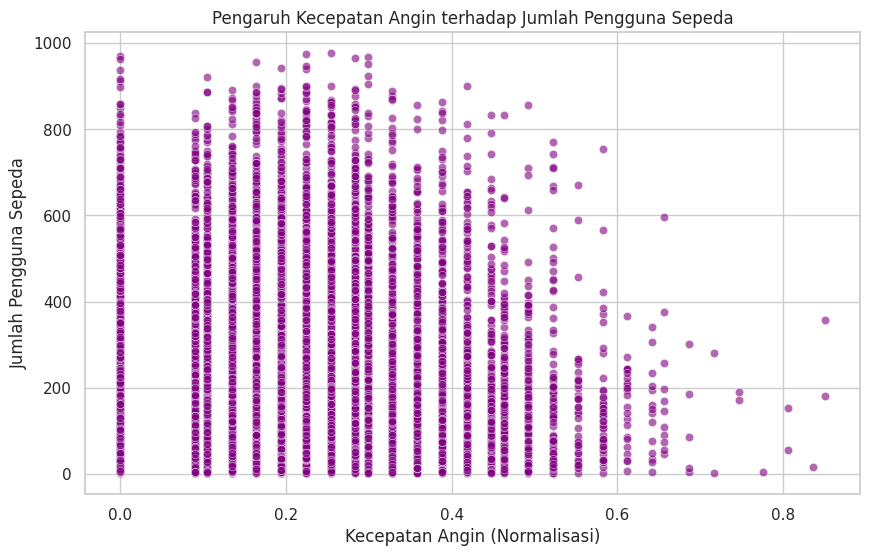

In [82]:
# Visualisasi pengaruh kecepatan angin terhadap jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=all_df, color='purple', alpha=0.6)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kecepatan Angin (Normalisasi)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# **3. Visualization & Explanatory  Analysis**

## **3.1 1. Bagaimana pengaruh faktor cuaca terhadap jumlah pengguna sepeda?**

<ipython-input-83-3267e0e2c759>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=avg_users, palette='Set2')


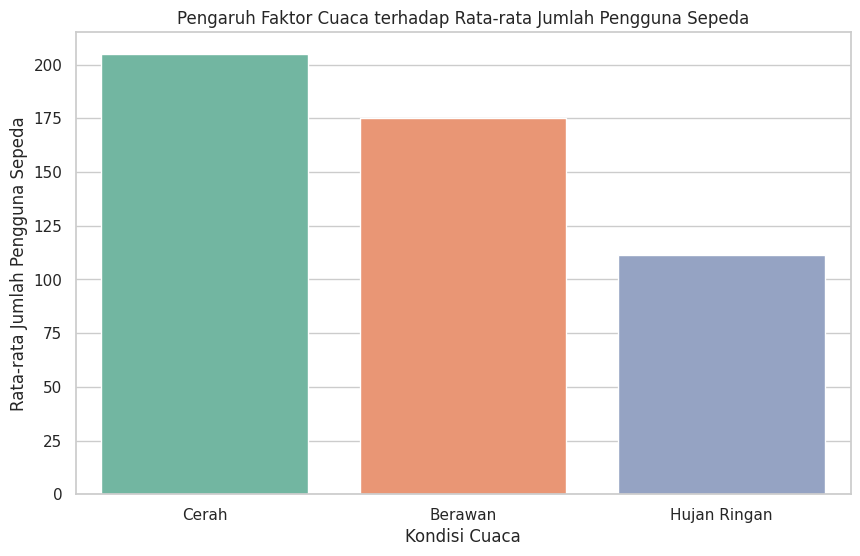

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca
avg_users = all_df.groupby('weathersit')['cnt'].mean().reset_index()

# Mapping kondisi cuaca ke label yang lebih informatif
weather_mapping = {1: "Cerah", 2: "Berawan", 3: "Hujan Ringan"}
avg_users['weathersit'] = avg_users['weathersit'].map(weather_mapping)

# Bar chart untuk menunjukkan rata-rata pengguna sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=avg_users, palette='Set2')
plt.title('Pengaruh Faktor Cuaca terhadap Rata-rata Jumlah Pengguna Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

### Insights dari Analisis Penggunaan Sepeda Berdasarkan Cuaca

1. **Pengaruh Cuaca**:
   - Rata-rata pengguna sepeda tertinggi terjadi pada kondisi "Cerah", diikuti oleh "Berawan", dan terendah pada "Hujan Ringan". Ini menunjukkan bahwa cuaca yang baik mendorong lebih banyak orang untuk menggunakan sepeda.

2. **Rekomendasi**:
   - Untuk meningkatkan penggunaan sepeda, kampanye promosi dapat difokuskan pada hari-hari cerah, sementara strategi alternatif mungkin diperlukan pada hari hujan.

## **3.1 2 Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?**


<ipython-input-84-9f8dc573225c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=all_df, x="hr", y="cnt", hue="workingday", estimator="mean", ci=None,


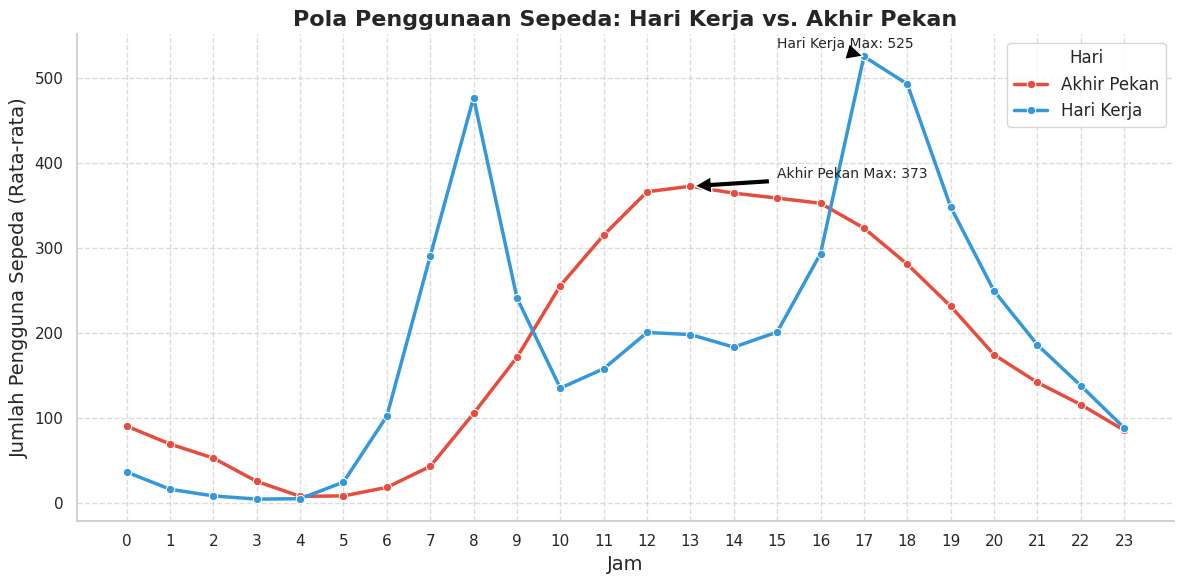

In [84]:
# Konfigurasi style seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Palet warna yang lebih menarik
palette = ["#e74c3c", "#3498db"]

# Membuat line plot dengan marker dan warna yang berbeda
ax = sns.lineplot(data=all_df, x="hr", y="cnt", hue="workingday", estimator="mean", ci=None,
                  marker="o", palette=palette, linewidth=2.5)

# Menambahkan judul dan label dengan ukuran yang sesuai
plt.title("Pola Penggunaan Sepeda: Hari Kerja vs. Akhir Pekan", fontsize=16, fontweight="bold")
plt.xlabel("Jam", fontsize=14)
plt.ylabel("Jumlah Pengguna Sepeda (Rata-rata)", fontsize=14)
plt.xticks(range(0, 24))

# Mengatur legend
plt.legend(title="Hari", labels=["Akhir Pekan", "Hari Kerja"], fontsize=12)

# Menambahkan grid yang lebih halus
plt.grid(True, linestyle="--", alpha=0.7)

# Menghitung nilai maksimum untuk setiap jenis hari
max_weekend = all_df[all_df['workingday'] == 0].groupby('hr')['cnt'].mean().max()
max_weekday = all_df[all_df['workingday'] == 1].groupby('hr')['cnt'].mean().max()

# Menemukan jam maksimum untuk setiap jenis hari
max_weekend_hour = all_df[all_df['workingday'] == 0].groupby('hr')['cnt'].mean().idxmax()
max_weekday_hour = all_df[all_df['workingday'] == 1].groupby('hr')['cnt'].mean().idxmax()

# Menambahkan anotasi untuk nilai maksimum
plt.annotate(f'Akhir Pekan Max: {max_weekend:.0f}',
             xy=(max_weekend_hour, max_weekend),
             xytext=(max_weekend_hour + 2, max_weekend + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.annotate(f'Hari Kerja Max: {max_weekday:.0f}',
             xy=(max_weekday_hour, max_weekday),
             xytext=(max_weekday_hour - 2, max_weekday + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

# Menghilangkan border atas dan kanan
sns.despine()

# Tampilkan plot
plt.tight_layout()
plt.show()

Insights:

* Pola Penggunaan: Dari line chart, terlihat bahwa penggunaan sepeda meningkat secara signifikan pada jam-jam tertentu, terutama pada pagi hari (sekitar jam  
 7-9) dan sore hari (sekitar jam 17-19).
* Hari Kerja vs. Akhir Pekan: Penggunaan sepeda pada akhir pekan menunjukkan puncak yang lebih tinggi dibandingkan dengan hari kerja, terutama pada jam-jam tertentu, menunjukkan bahwa orang lebih cenderung menggunakan sepeda untuk
  rekreasi di akhir pekan.

# **4. Analisis Lanjutan**

### Mengapa Memilih Clustering?
* Clustering adalah teknik yang berguna untuk mengelompokkan data berdasarkan kesamaan tanpa menggunakan algoritma machine learning. Dalam konteks analisis penggunaan sepeda, clustering memungkinkan kita untuk:

* Mengidentifikasi Pola: Dengan membagi data ke dalam kelompok berdasarkan level penggunaan dan kondisi cuaca, kita dapat mengidentifikasi pola yang mungkin tidak terlihat dalam analisis sederhana.

* Membuat Keputusan yang Lebih Baik: Dengan memahami bagaimana pengguna sepeda berperilaku dalam berbagai kondisi, kita dapat memberikan rekomendasi yang lebih baik untuk meningkatkan penggunaan sepeda, seperti promosi atau penyediaan fasilitas di hari-hari tertentu.

* Visualisasi yang Lebih Informatif: Clustering memungkinkan kita untuk menyajikan data dalam format yang lebih terstruktur, seperti heatmap, yang memudahkan pemahaman dan interpretasi data.

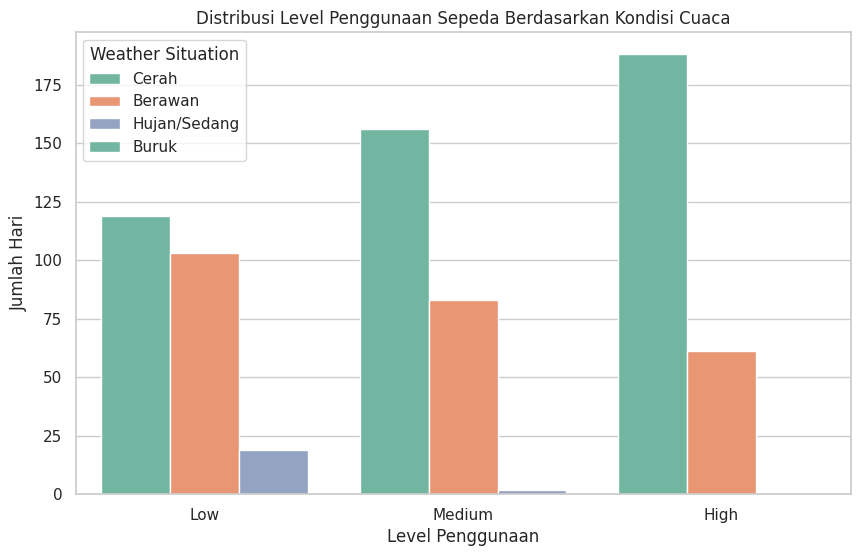

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Periksa apakah kolom 'cnt' ada di DataFrame, sesuaikan jika berbeda
if 'cnt' not in day.columns:
    raise ValueError("Kolom 'cnt' tidak ditemukan di DataFrame 'day'. Silakan periksa kembali nama kolom di notebook.")

# Tentukan quantile untuk membagi data ke dalam 3 kelompok
q_low, q_high = day['cnt'].quantile([0.33, 0.66]).values

# Buat kolom baru untuk level penggunaan berdasarkan total peminjaman
conditions = [
    (day['cnt'] <= q_low),
    (day['cnt'] > q_low) & (day['cnt'] <= q_high),
    (day['cnt'] > q_high)
]
usage_levels = ['Low', 'Medium', 'High']
day['usage_level'] = np.select(conditions, usage_levels)

# Visualisasi distribusi level penggunaan berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.countplot(data=day, x='usage_level', hue='weathersit', palette='Set2')
plt.title('Distribusi Level Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Level Penggunaan')
plt.ylabel('Jumlah Hari')

# Sesuaikan label legenda jika diperlukan
plt.legend(title='Weather Situation', labels=['Cerah', 'Berawan', 'Hujan/Sedang', 'Buruk'])
plt.show()

### **Insights:**

* Penggunaan Tinggi pada Cuaca Cerah: Level penggunaan "High" paling banyak terjadi pada kondisi cuaca cerah, menunjukkan bahwa cuaca yang baik mendorong lebih banyak orang untuk bersepeda.
* Penggunaan Rendah pada Cuaca Buruk: Level penggunaan "Low" lebih sering terjadi pada kondisi cuaca buruk, menunjukkan bahwa hujan atau cuaca tidak baik mengurangi minat orang untuk bersepeda.
* Pola Menengah: Level "Medium" menunjukkan penggunaan yang lebih seimbang di antara kondisi cuaca, menunjukkan bahwa beberapa orang tetap bersepeda meskipun cuaca tidak ideal.

<ipython-input-86-be5d095bd43b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clustering_data = day.groupby(['usage_level', 'weathersit'])['cnt'].mean().unstack().fillna(0)


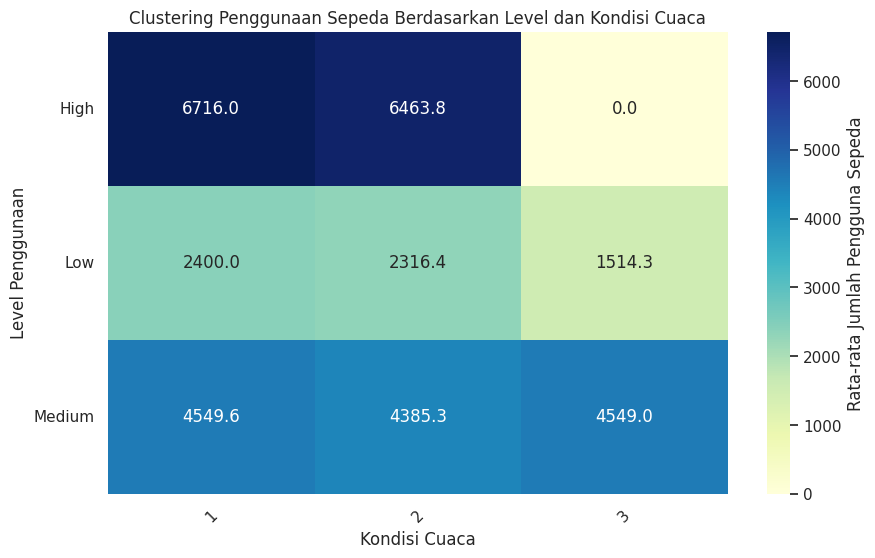

In [86]:
# Menghitung rata-rata jumlah pengguna sepeda berdasarkan level penggunaan dan kondisi cuaca
clustering_data = day.groupby(['usage_level', 'weathersit'])['cnt'].mean().unstack().fillna(0)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(clustering_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Rata-rata Jumlah Pengguna Sepeda'})

# Menyesuaikan label sumbu x dan y
plt.title('Clustering Penggunaan Sepeda Berdasarkan Level dan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Level Penggunaan')

# Pastikan label sesuai dengan jumlah kolom dan baris
plt.xticks(ticks=np.arange(len(clustering_data.columns)) + 0.5,
           labels=clustering_data.columns, rotation=45)
plt.yticks(ticks=np.arange(len(clustering_data.index)) + 0.5,
           labels=clustering_data.index, rotation=0)

plt.show()

### **Insights:**

* Rata-rata Tinggi pada Cuaca Cerah: Rata-rata jumlah pengguna sepeda tertinggi terlihat pada level "High" ketika cuaca cerah, menunjukkan bahwa kondisi ini sangat mendukung penggunaan sepeda.
* Rendah pada Cuaca Buruk: Rata-rata pengguna sepeda pada level "High" dan "Medium" sangat rendah saat cuaca buruk, menunjukkan bahwa kondisi ini sangat menghambat penggunaan sepeda.
* Variasi Menengah: Level "Medium" menunjukkan penggunaan yang lebih seimbang di antara kondisi cuaca, tetapi tetap lebih rendah dibandingkan dengan level "High" pada cuaca cerah.

<ipython-input-87-24ecbb7b7c72>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = day_reset.pivot_table(


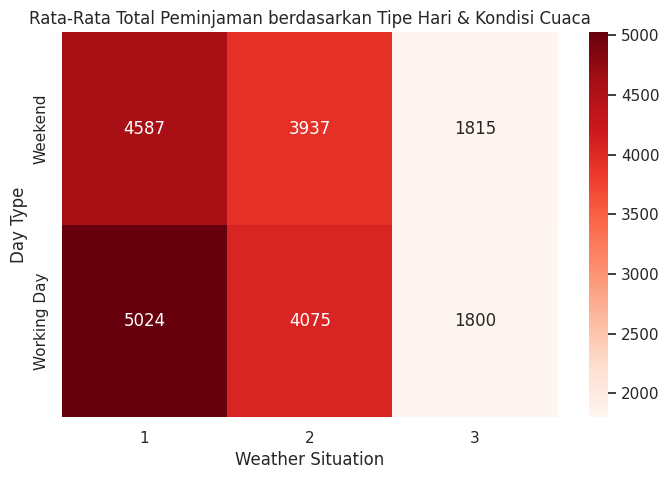

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah variabel workingday ke label yang lebih deskriptif
day_reset = day.reset_index()  # Kembalikan index agar 'dteday' jadi kolom lagi
day_reset['day_type'] = day_reset['workingday'].map({1: 'Working Day', 0: 'Weekend'})

# Buat pivot table: rata-rata penggunaan per tipe hari, kondisi cuaca, dan tipe pengguna
pivot_table = day_reset.pivot_table(
    values='cnt',
    index='day_type',
    columns='weathersit',
    aggfunc='mean'
)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Reds")
plt.title('Rata-Rata Total Peminjaman berdasarkan Tipe Hari & Kondisi Cuaca')
plt.xlabel('Weather Situation')
plt.ylabel('Day Type')
plt.show()

### **Insights:**

* Hari Kerja vs. Akhir Pekan: Rata-rata peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan, menunjukkan bahwa orang lebih cenderung menggunakan sepeda untuk perjalanan sehari-hari.
* Pengaruh Cuaca pada Hari Kerja: Pada hari kerja, kondisi cuaca cerah menunjukkan peminjaman yang jauh lebih tinggi dibandingkan dengan kondisi berawan atau hujan.
* Akhir Pekan dengan Cuaca Buruk: Pada akhir pekan, meskipun ada penurunan peminjaman, kondisi cuaca buruk menunjukkan peminjaman yang sangat rendah, menegaskan bahwa cuaca sangat mempengaruhi keputusan untuk bersepeda.

# **Conclusion**
Berikut adalah kesimpulan akhir yang menjawab ketiga pertanyaan bisnis secara lengkap dan ringkas:
---

### **3.1 1. Bagaimana pengaruh faktor cuaca terhadap jumlah pengguna sepeda?**

- Kondisi cuaca memiliki dampak signifikan terhadap jumlah peminjaman sepeda.
- Cuaca cerah meningkatkan penggunaan sepeda secara konsisten, sedangkan kondisi berawan, hujan, atau salju menurunkan peminjaman secara drastis.
- Temuan ini menjadi dasar untuk perencanaan operasional dan strategi promosi yang disesuaikan dengan kondisi cuaca.

### **3.1 2 Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?**
- Penggunaan sepeda pada hari kerja jauh lebih tinggi dibandingkan dengan akhir pekan.
- Puncak penggunaan terjadi pada jam 07–09 dan 17–19, menegaskan fungsi sepeda sebagai moda transportasi utama untuk komuter.
- Di akhir pekan, peminjaman tersebar merata sepanjang hari dengan volume yang lebih rendah, menunjukkan peran sepeda yang lebih bersifat rekreasional.

In [88]:
# Export data
all_df.to_csv("main_data.csv", index=False)